<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#mulearn" data-toc-modified-id="mulearn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>mulearn</a></span><ul class="toc-item"><li><span><a href="#Install" data-toc-modified-id="Install-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Install</a></span></li><li><span><a href="#How-to-use" data-toc-modified-id="How-to-use-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>How to use</a></span></li></ul></li></ul></div>

In [ ]:
from mulearn import kernel, FuzzyInductor

from mulearn.fuzzifier import LinearFuzzifier
from mulearn.fuzzifier import ExponentialFuzzifier
from mulearn.kernel import GaussianKernel

from mulearn.optimization import solve_optimization_gurobi
from mulearn.optimization import solve_optimization_tensorflow

# mulearn

mulearn is a python package implementing the data-driven induction of fuzzy sets described in

- D. Malchiodi and W. Pedrycz, _Learning Membership Functions for Fuzzy Sets through Modified Support Vector Clustering_, in F. Masulli, G. Pasi e R. Yager (Eds.), Fuzzy Logic and Applications. 10th International Workshop, WILF 2013, Genoa, Italy, November 19–22, 2013. Proceedings., Vol. 8256, Springer International Publishing, Switzerland, Lecture Notes on Artificial Intelligence.

## Install

`pip install mulearn`

## How to use

Fill me in please! Don't forget code examples:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(source, header=None)
iris_df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

iris_values = iris_df.iloc[:,0:4].values
iris_labels = iris_df.iloc[:,4].values

pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values)

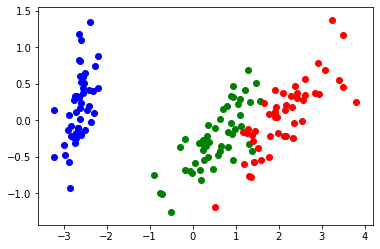

In [ ]:
def gr_dataset(): 
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'green', 'red')):
        plt.scatter(iris_values_2d[iris_labels==lab, 0],
                    iris_values_2d[iris_labels==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [ ]:
def to_membership_values(labels, target):
    return [1 if l==target else 0 for l in labels]

mu = {}
for target in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    mu[target] = to_membership_values(iris_labels, target)

In [ ]:
def gr_membership_contour(estimated_membership):
    x = np.linspace(-4, 4, 50)
    y = np.linspace(-4, 4, 50)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.1, .3, .5, .95), colors='k')
    plt.clabel(membership_contour, inline=1)
    

fitting 1, GaussianKernel(1), (<class 'mulearn.fuzzifier.LinearFuzzifier'>, {})


  0%|          | 0/100 [00:00<?, ?it/s]

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


100%|██████████| 100/100 [00:16<00:00,  5.94it/s]


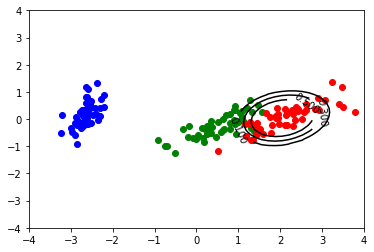

In [ ]:
f = FuzzyInductor(fuzzifier=(LinearFuzzifier, {}))
f.fit(iris_values_2d, mu['Iris-virginica'])

gr_dataset()
gr_membership_contour(f.estimated_membership_)
plt.show()

fitting 1, GaussianKernel(1), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})


100%|██████████| 100/100 [00:18<00:00,  5.40it/s]


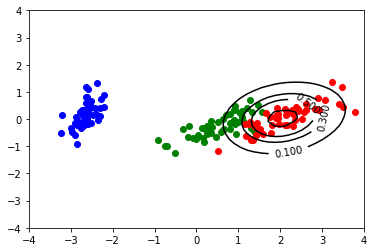

In [ ]:
f = FuzzyInductor()
f.fit(iris_values_2d, mu['Iris-virginica'])
gr_dataset()
gr_membership_contour(f.estimated_membership_)
plt.show()

fitting 1, GaussianKernel(1), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {'profile': 'alpha', 'alpha': 0.25})


100%|██████████| 100/100 [00:19<00:00,  5.12it/s]


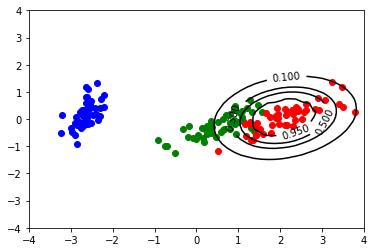

In [ ]:
f = FuzzyInductor(fuzzifier=(ExponentialFuzzifier,
                             {'profile': 'alpha', 'alpha': 0.25}))
f.fit(iris_values_2d, mu['Iris-virginica'])

gr_dataset()
gr_membership_contour(f.estimated_membership_)
plt.show()

fitting 1, GaussianKernel(0.3), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})


100%|██████████| 100/100 [00:20<00:00,  4.92it/s]


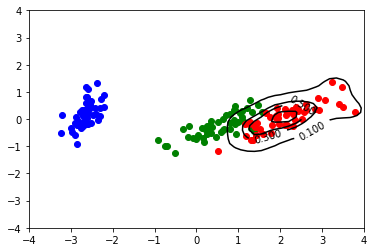

In [ ]:
f = FuzzyInductor(k=GaussianKernel(.3))
f.fit(iris_values_2d, mu['Iris-virginica'])

gr_dataset()
gr_membership_contour(f.estimated_membership_)
plt.show()

fitting 1, GaussianKernel(1), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})
Academic license - for non-commercial use only


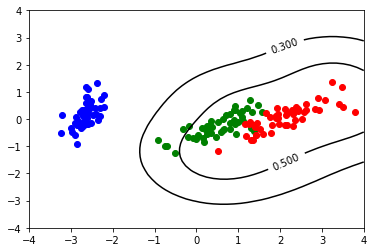

In [ ]:
try:
    f = FuzzyInductor(solve_strategy=(solve_optimization_gurobi, {}))
    f.fit(iris_values_2d, mu['Iris-virginica'])

    gr_dataset()
    gr_membership_contour(f.estimated_membership_)
    plt.show()
except (ModuleNotFoundError, ValueError):
    print('Gurobi not available')

fitting 1, GaussianKernel(1.5), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {'profile': 'alpha', 'alpha': 0.15})


100%|██████████| 20/20 [00:04<00:00,  4.37it/s]


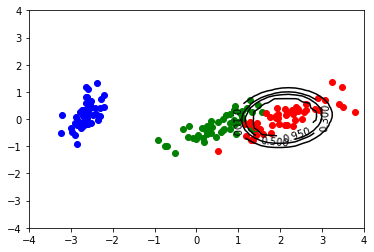

In [ ]:
f = FuzzyInductor(fuzzifier=(ExponentialFuzzifier,
                             {'profile': 'alpha', 'alpha': 0.15}),
                  k=GaussianKernel(1.5),
                  solve_strategy=(solve_optimization_tensorflow,
                                  {'n_iter': 20}),
                  return_profile=True)
f.fit(iris_values_2d, mu['Iris-virginica'])

gr_dataset()
gr_membership_contour(f.estimated_membership_)
plt.show()

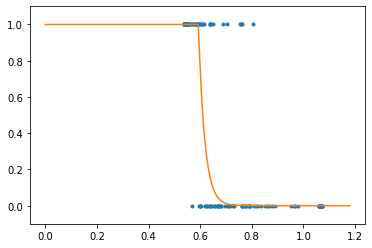

In [ ]:
plt.plot(f.profile_[0], mu['Iris-virginica'], '.')
plt.plot(f.profile_[1], f.profile_[2])
plt.ylim((-0.1, 1.1))
plt.show()

In [ ]:
sigmas = [.225,.5]
parameters = {'c': [1,10,100],
              'k': [GaussianKernel(i) for i in sigmas]}

In [ ]:
from sklearn.model_selection import GridSearchCV

f = FuzzyInductor()

virginica = GridSearchCV(f, param_grid=parameters, cv=2)
virginica.fit(iris_values_2d, mu['Iris-virginica'])


  0%|          | 0/100 [00:00<?, ?it/s]

fitting 1, GaussianKernel(0.225), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:09<00:00, 10.89it/s][A

  0%|          | 0/100 [00:00<?, ?it/s]

fitting 1, GaussianKernel(0.225), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:09<00:00, 10.22it/s]
/home/malchiodi/repo/web/mulearn/mulearn/__init__.py:98: UserWarning: No support vectors found
  warn('No support vectors found')
/home/malchiodi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'NoneType' object is not callable

  FitFailedWarning)

  0%|          | 0/100 [00:00<?, ?it/s]

fitting 1, GaussianKernel(0.5), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:09<00:00, 10.85it/s][A

  0%|          | 0/100 [00:00<?, ?it/s]

fitting 1, GaussianKernel(0.5), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:09<00:00, 10.88it/s][A
/home/malchiodi/repo/web/mulearn/mulearn/__init__.py:98: UserWarning: No support vectors found
  warn('No support vectors found')
/home/malchiodi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'NoneType' object is not callable

  FitFailedWarning)

  0%|          | 0/100 [00:00<?, ?it/s]

fitting 10, GaussianKernel(0.225), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:09<00:00, 10.54it/s][A

  0%|          | 0/100 [00:00<?, ?it/s]

fitting 10, GaussianKernel(0.225), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:09<00:00, 10.80it/s][A
/home/malchiodi/repo/web/mulearn/mulearn/__init__.py:98: UserWarning: No support vectors found
  warn('No support vectors found')
/home/malchiodi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'NoneType' object is not callable

  FitFailedWarning)

  0%|          | 0/100 [00:00<?, ?it/s]

fitting 10, GaussianKernel(0.5), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:09<00:00, 10.79it/s][A

  0%|          | 0/100 [00:00<?, ?it/s]

fitting 10, GaussianKernel(0.5), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:09<00:00, 10.60it/s][A
/home/malchiodi/repo/web/mulearn/mulearn/__init__.py:98: UserWarning: No support vectors found
  warn('No support vectors found')
/home/malchiodi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'NoneType' object is not callable

  FitFailedWarning)

  0%|          | 0/100 [00:00<?, ?it/s]

fitting 100, GaussianKernel(0.225), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:09<00:00, 10.81it/s][A

  0%|          | 0/100 [00:00<?, ?it/s]

fitting 100, GaussianKernel(0.225), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:09<00:00, 10.64it/s]
/home/malchiodi/repo/web/mulearn/mulearn/__init__.py:98: UserWarning: No support vectors found
  warn('No support vectors found')
/home/malchiodi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'NoneType' object is not callable

  FitFailedWarning)

  0%|          | 0/100 [00:00<?, ?it/s]

fitting 100, GaussianKernel(0.5), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:09<00:00, 10.74it/s][A

  0%|          | 0/100 [00:00<?, ?it/s]

fitting 100, GaussianKernel(0.5), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:09<00:00, 10.76it/s][A
/home/malchiodi/repo/web/mulearn/mulearn/__init__.py:98: UserWarning: No support vectors found
  warn('No support vectors found')
/home/malchiodi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'NoneType' object is not callable

  FitFailedWarning)


fitting 1, GaussianKernel(0.225), (<class 'mulearn.fuzzifier.ExponentialFuzzifier'>, {})



100%|██████████| 100/100 [00:18<00:00,  5.40it/s]


GridSearchCV(cv=2, error_score=nan,
             estimator=FuzzyInductor(c=1,
                                     fuzzifier=(<class 'mulearn.fuzzifier.ExponentialFuzzifier'>,
                                                {}),
                                     k=GaussianKernel(1), random_state=None,
                                     return_profile=False,
                                     solve_strategy=(<function solve_optimization_tensorflow at 0x7f039fd4f1e0>,
                                                     {})),
             iid='deprecated', n_jobs=None,
             param_grid={'c': [1, 10, 100],
                         'k': [GaussianKernel(0.225), GaussianKernel(0.5)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

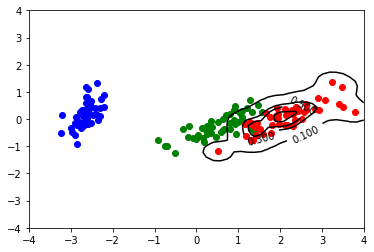

In [ ]:
gr_dataset()
gr_membership_contour(virginica.best_estimator_.estimated_membership_)
plt.show()

In [ ]:
import pickle

saved_estimator = pickle.dumps(virginica.best_estimator_)

In [ ]:
loaded_estimator = pickle.loads(saved_estimator)

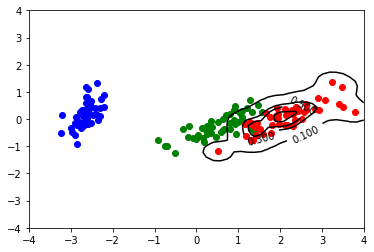

In [ ]:
gr_dataset()
gr_membership_contour(loaded_estimator.estimated_membership_)
plt.show()